# **ELEMENTOS FINITOS OLVER**

## **Ejemplo 14.3**

Consider the boundary value problem

$$  -\frac{d}{dx}(x + 1) \frac{du}{dx} = 1 \quad \quad \quad  u(0)=0 \quad \quad \quad  u(1)=0 $$

The explicit solution is easily found by direct integration:

$$ u(x) = -x + \frac{\log(x + 1)}{\log 2}$$

It minimizes the associated quadratic functional

$$ \mathcal{P}[u] = \int_{0}^{l} [\frac{1}{2}(x+1)u'(x^2) -u(x) ] dx    $$

over all possible functions $ u \in {C}^{1}$ that satisfy the given boundary conditions. The finite
element system (14.7) has coefficient matrix given by (14.13) and right hand side (14.16),
where

$$ s_j = \int_{x_j}^{x_{j + 1}} (1 + x)dx = h(1 + x_j) + \frac{1}{2}h^2 = h + h^2(j + \frac{1}{2} ) \quad \quad \quad b_j = \int_{x_j}^{x_{j + 1}} 1 dx = h$$

The resulting solution is plotted in Figure 14.3. The first three graphs contain, respectively,
5, 10, 20 points in the mesh, so that h = .2, .1, .05, while the last plots the exact solution
(14.20). Even when computed on rather coarse meshes, the finite element approximation
is quite respectable.

Construyamos la Matrix tridiagonal M para cada uno de los tres casos.LLamemos a estas $M_1, M_2, M_3$ para $h_1 = 0.2, h_2 = 0.1, h_3 = 0.05$ respectivamente. Las dimensiones de estas serán: $M_1$ una matriz simétrica $4 \times 4$, $M_2$ una matriz simétrica $9 \times 9$ y $M_3$ una matriz simétrica $19 \times 19$

Instalamos el paquete de numpy en el Jupyter Notebook

In [ ]:
import sys
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user matplotlib

import matplotlib.pyplot as plt 
import numpy as np

np.set_printoptions(suppress=True)

Recordemos que la forma de la matriz tritiangular dado $ s_j = h + h^2(j + \frac{1}{2}) $ es igual a:

$$ M = \frac{1}{h^2} \begin{vmatrix}
s_0 + s_1 & -s_1  &  &  & \\
-s_1 & s_1 + s_2 & -s_2 & & \\
 & -s_2 &  s_2 + s_3 &  -s_3 & \\
  &  \ddots  & \ddots & \ddots & \\
\end{vmatrix}$$

In [57]:
def sj_values(h):
    j_limit = 1/h
    j = 0
    s_array = []
    while j < j_limit:
        s = h + (h**2)*(j + 1/2)
        s_array.append(s) 
        j += 1

    return s_array

def tridiagonal_matrix(h):
    s_array = sj_values(h)
    main_diag = []
    sec_diag = []
    for i in range(len(s_array)):
        if i < (len(s_array)-1):
            main_diag.append(s_array[i] + s_array[i + 1])
        if i>0 and i < (len(s_array) - 1):
            sec_diag.append((-1)*s_array[i])
        
    
    main_diag = np.array(main_diag)
    sec_diag = np.array(sec_diag)
    d = np.diag(main_diag)
    s_1 = np.diag(sec_diag, k=1)
    s_2 = np.diag(sec_diag, k=-1)
    matrix = d + s_1 + s_2
    matrix = matrix*(1/(h**2))

    return matrix, len(s_array)
        


Definimos dos funciones para la construir la matriz tridiagonal, la primera encuentra todos los valores $s_j$ dentro del intervalo y la segunda crea las diagonales de la matriz. La diagonal principal la encuentra sumando $s_j + s_{j + 1}$ desde $j = 0$ hasta $j = 1/h - 1$. La otra diagonal que es la misma para arriba y abajo de la diagonal principal es el negativo de $s_j$ desde $j = 0$ hasta $j = 1/h - 2$. Se construyen tres matrices con las diagonales y se suman para obtener la matriz tridiagonal.

In [58]:
def linearSystem(h):
    matrix = tridiagonal_matrix(h)[0]
    dim = tridiagonal_matrix(h)[1] - 1

    b = [h]*dim 
    b = np.transpose(np.matrix(np.array(b)))

    matrix_inverse = np.linalg.inv(matrix)
    c = matrix_inverse*b

    return c


Para resolver el sistema $Mc = b$, construimos el vector $b$ que corresponde a un vector columna de dimnesión $\frac{1}{h} - 1$ y obtenemos la inversa de $M$ para resolver $c = M^{-1} b$. 

Ahora creamos una función para graficar los coeficientes obtenidos. 

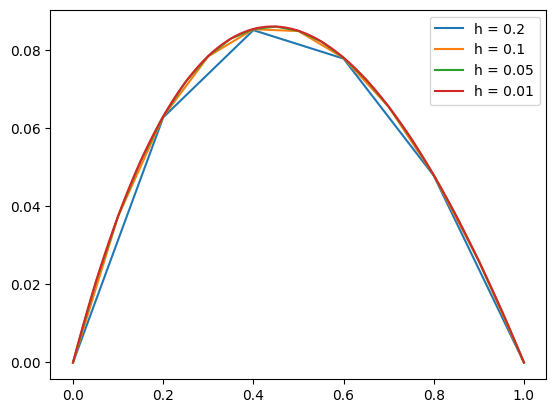

In [95]:

def h_plot(h):
    c = linearSystem(h)
    c = np.transpose(c)
    y = c.tolist()[0]
    y.insert(0, 0)
    y.append(0)
    
    x = []
    i = 0

    while i < 1:
        i = round(i, 2)
        x.append(i)
        i += h
    
    x.append(1.0)

    plot_label = "h = " + str(h)
    plt.plot(x,y, label= plot_label)

    return x, y, len(x), len(y)

def show_results(h):
    c = h_plot(h)
    plt.show()
    print(c)


def all_h_plots(h_array):
    for h in h_array:
        h_plot(h)
    plt.legend()
    plt.show()
    return None

h_array = [0.2, 0.1, 0.05, 0.01]

all_h_plots(h_array)
